In [1]:
import kagglehub
!kaggle datasets download -d 'hasyimabdillah/workoutexercises-images'

Dataset URL: https://www.kaggle.com/datasets/hasyimabdillah/workoutexercises-images
License(s): CC-BY-NC-SA-4.0
100% 814M/818M [00:13<00:00, 122MB/s]
100% 818M/818M [00:13<00:00, 61.4MB/s]


In [2]:
!unzip workoutexercises-images.zip -d workoutexercises-images

Streaming output truncated to the last 5000 lines.
  inflating: workoutexercises-images/pull up/pull up_700211.jpg  
  inflating: workoutexercises-images/pull up/pull up_700221.jpg  
  inflating: workoutexercises-images/pull up/pull up_700231.jpg  
  inflating: workoutexercises-images/pull up/pull up_700241.jpg  
  inflating: workoutexercises-images/pull up/pull up_700251.jpg  
  inflating: workoutexercises-images/pull up/pull up_700261.jpg  
  inflating: workoutexercises-images/pull up/pull up_800001.jpg  
  inflating: workoutexercises-images/pull up/pull up_800011.jpg  
  inflating: workoutexercises-images/pull up/pull up_800021.jpg  
  inflating: workoutexercises-images/pull up/pull up_800031.jpg  
  inflating: workoutexercises-images/pull up/pull up_800041.jpg  
  inflating: workoutexercises-images/pull up/pull up_800051.jpg  
  inflating: workoutexercises-images/pull up/pull up_800061.jpg  
  inflating: workoutexercises-images/pull up/pull up_800071.jpg  
  inflating: workoutexerc

In [5]:
!pip install numpy pandas opencv-python matplotlib mediapipe tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.8 MB/s eta 0:00:00


In [6]:
!pip install mediapipe


In [7]:
import os

def list_files_in_subfolders(directory):
    # Initialize a dictionary to store folder names and file counts
    folder_file_counts = {}

    # Walk through the directory and its subfolders
    for root, dirs, files in os.walk(directory):
        # Get the folder name (relative to the provided directory)
        folder_name = os.path.basename(root)

        # Count the number of files in the current folder
        file_count = len(files)

        # Store the count for the folder
        folder_file_counts[folder_name] = file_count

    return folder_file_counts

# Provide the path of the main directory
directory = '/content/workoutexercises-images'

# Get the count of files in each subfolder
file_counts = list_files_in_subfolders(directory)

# Print out the subfolder names and their file counts
for folder, count in file_counts.items():
    print(f"Subfolder: {folder},      File count: {count}")


Subfolder: workoutexercises-images,      File count: 0
Subfolder: chest fly machine,      File count: 527
Subfolder: squat,      File count: 742
Subfolder: tricep pushdown,      File count: 625
Subfolder: decline bench press,      File count: 514
Subfolder: lat pulldown,      File count: 646
Subfolder: leg raises,      File count: 514
Subfolder: deadlift,      File count: 530
Subfolder: shoulder press,      File count: 512
Subfolder: bench press,      File count: 625
Subfolder: russian twist,      File count: 522
Subfolder: tricep dips,      File count: 698
Subfolder: t bar row,      File count: 668
Subfolder: hip thrust,      File count: 557
Subfolder: romanian deadlift,      File count: 555
Subfolder: incline bench press,      File count: 729
Subfolder: barbell biceps curl,      File count: 705
Subfolder: hammer curl,      File count: 546
Subfolder: push up,      File count: 601
Subfolder: pull up,      File count: 615
Subfolder: lateral raises,      File count: 843
Subfolder: plank,

Loading data...
Loaded 12818 images with 22 unique labels.
Training on 10254 samples and validating on 2564 samples.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1150 - loss: 2.9683 - val_accuracy: 0.3510 - val_loss: 2.2001
Epoch 2/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2712 - loss: 2.3399 - val_accuracy: 0.4583 - val_loss: 1.8032
Epoch 3/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3293 - loss: 2.0824 - val_accuracy: 0.4945 - val_loss: 1.6417
Epoch 4/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3762 - loss: 1.9187 - val_accuracy: 0.5062 - val_loss: 1.5736
Epoch 5/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3882 - loss: 1.8881 - val_accuracy: 0.5222 - val_loss: 1.4508
Epoch 6/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4219 - loss: 1.7594 - val_accuracy: 0.5573 - val_loss: 1.4068
Epoch 7/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4469 - loss: 1.7040 - val_accuracy: 0.5706 - val_loss: 1.3158
Epoch 8/50
641/641 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4510 - loss: 1.65

Final Train Accuracy: 78.50%
Final Validation Accuracy: 76.21%
Model saved as 'exercise.h5'.


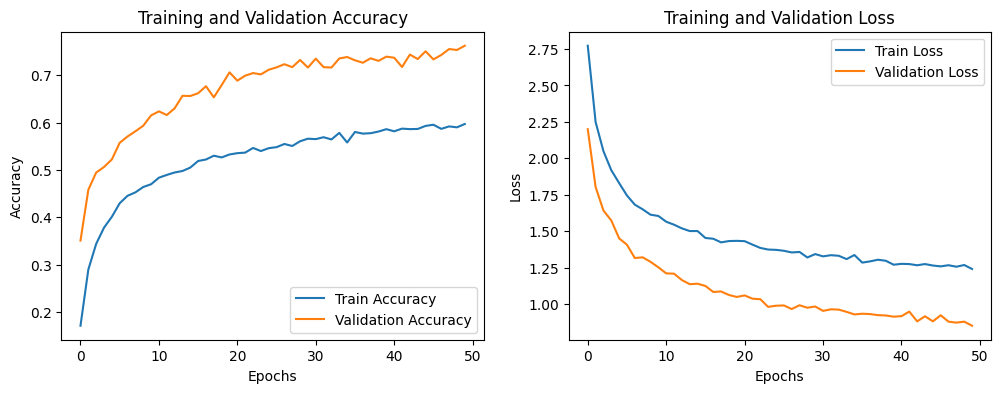

In [8]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

# Function to detect keypoints
def detect_keypoints(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        keypoints = []
        for landmark in results.pose_landmarks.landmark:
            keypoints.append((landmark.x, landmark.y, landmark.z, landmark.visibility))
        return np.array(keypoints).flatten()  # Flatten to create a 1D array
    return None

# Load and preprocess images
def load_data(data_dir):
    images = []
    labels = []

    print("Loading data...")
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            image = cv2.imread(img_path)
            keypoints = detect_keypoints(image)
            if keypoints is not None:
                images.append(keypoints)
                labels.append(label)

    print(f"Loaded {len(images)} images with {len(set(labels))} unique labels.")
    return np.array(images), np.array(labels)

# Load dataset
data_dir = '/content/workoutexercises-images/'  # Update with your dataset path
X, y = load_data(data_dir)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"Training on {X_train.shape[0]} samples and validating on {X_val.shape[0]} samples.")

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of classes
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
epochs = 50
print("Starting training...")
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=16)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Final Train Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")

# Save the model
model.save('exercise.h5')
print("Model saved as 'exercise.h5'.")

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Assuming you have your labels in the variable `y`
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save the label encoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [3]:
!pip install opencv-python mediapipe tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 55.4 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted Pose: chest fly machine


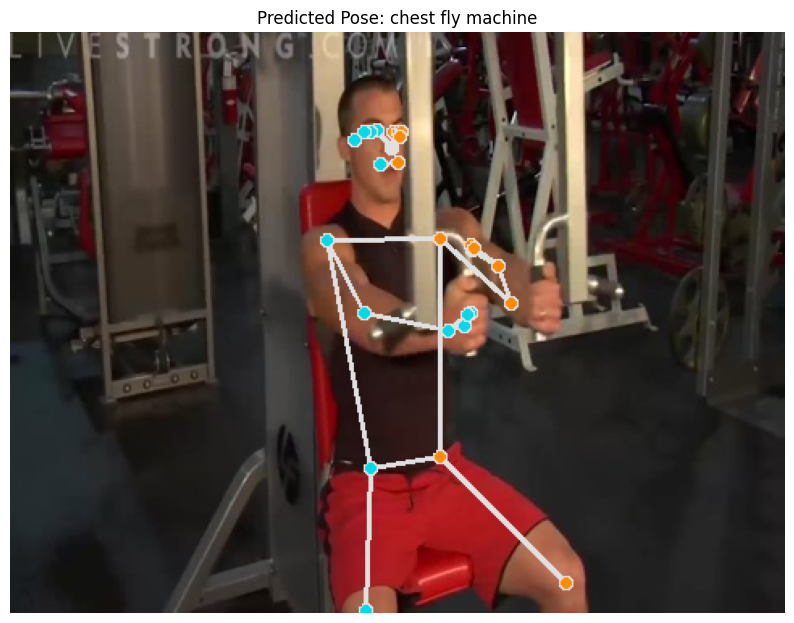

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import joblib  # For loading the label encoder

# Load the trained model
model = tf.keras.models.load_model('/content/exercise.h5')

# Load the label encoder
label_encoder = joblib.load('/content/label_encoder (1).pkl')  # Ensure this matches the encoder used during training

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

# Function to detect keypoints
def detect_keypoints(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        keypoints = []
        h, w, _ = image.shape  # Get image dimensions

        for landmark in results.pose_landmarks.landmark:
            # Normalize keypoints to image dimensions
            keypoints.append((landmark.x * w, landmark.y * h, landmark.z * w, landmark.visibility))
        return np.array(keypoints).flatten(), results.pose_landmarks
    return None, None

# Function to normalize keypoints
def normalize_keypoints(keypoints, image_shape):
    h, w, _ = image_shape
    keypoints[:, 0] /= w  # Normalize x-coordinates
    keypoints[:, 1] /= h  # Normalize y-coordinates
    keypoints[:, 2] /= w  # Normalize z-coordinates
    return keypoints.flatten()

# Function to display keypoints and connections on the image
def display_keypoints_and_connections(image, pose_landmarks):
    # Annotate the image with keypoints and connections
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        pose_landmarks,
        mp_pose.POSE_CONNECTIONS,  # Predefined connections for body parts
        mp_drawing_styles.get_default_pose_landmarks_style()  # Style for the skeleton
    )
    return annotated_image

# Load an image for testing
image_path ='/content/workoutexercises-images/chest fly machine/cfm_1000041.jpg'  # Update with your image path
image = cv2.imread(image_path)

# Detect keypoints
keypoints, pose_landmarks = detect_keypoints(image)

if keypoints is not None:
    # Normalize keypoints for the model
    normalized_keypoints = normalize_keypoints(keypoints.reshape(-1, 4), image.shape)

    # Prepare keypoints for model input
    keypoints_input = normalized_keypoints.reshape(1, -1)  # Reshape for model input
    prediction = model.predict(keypoints_input)
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Get the predicted pose name
    predicted_pose_name = label_encoder.inverse_transform([predicted_class_index])[0]

    # Display the predicted pose
    print(f"Predicted Pose: {predicted_pose_name}")

    # Display keypoints and connections on the image
    image_with_skeleton = display_keypoints_and_connections(image.copy(), pose_landmarks)

    # Show the image with keypoints and connections
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_skeleton, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted Pose: {predicted_pose_name}")
    plt.show()
else:
    print("No keypoints detected.")
